In [2]:
%pip install numpy scikit-learn matplotlib keras tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 200.4 MB 67 kB/s  eta 0:00:01    |█████████                       | 56.6 MB 5.9 MB/s eta 0:00:25     |███████████████▏                | 95.2 MB 3.8 MB/s eta 0:00:29     |████████████████████████▍       | 152.4 MB 4.1 MB/s eta 0:00:12
     |████████████████████████████████| 5.5 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 651 kB/s eta 0:00:011
     |████████████████████████████████| 426 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 4.2 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 57 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 12

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import Input

/Users/larissaiuki/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## DATASET
Geramos uma base de dados artificial chamada circles, composta por 100 pontos em dois círculos concêntricos. Cada ponto foi rotulado em duas classes (azul e vermelho). Esse tipo de base é interessante porque não pode ser separado por um classificador linear simples, exigindo o uso de uma rede neural com camadas escondidas para aprender a fronteira de decisão.

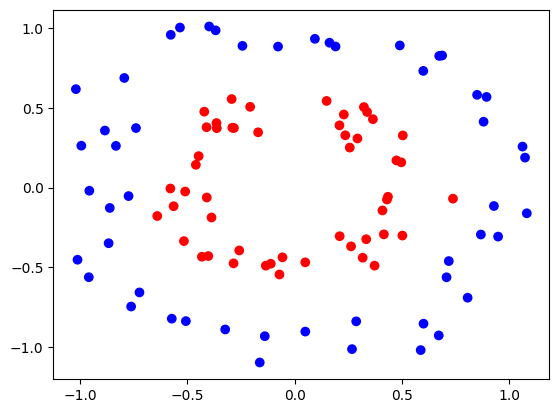

In [2]:
X, Y = datasets.make_circles(100, noise=0.1, factor=0.5)

color = ['blue' if k == 0 else 'red' for k in Y]
plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('circulos.svg')

## Função de ativação
Essas funções servem para que a rede consiga aprender relações não lineares.

Sem elas, a rede seria apenas uma combinação linear de entradas (como uma regressão linear), incapaz de resolver problemas como o dataset dos círculos que você mostrou.

A sigmoid é comum em camadas de saída binárias, e a tanh é usada em camadas escondidas porque é simétrica em torno de zero (facilita o aprendizado).

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

## Rede Manual

Acurácia inicial: 64% → antes do treinamento, a rede estava quase no nível de chute aleatório (50%).

Evolução do erro (loss):

Iteração 0: 14.48 (muito alto).

Iteração 1000: 0.42.

Iteração 2000: 0.24.

Iteração 3000: 0.17.

Iteração 4000: 0.12.

Acurácia final: 100% → a rede conseguiu aprender a separar perfeitamente os dados após retropropagação.

Interpretação: o algoritmo de retropropagação e gradiente descendente funcionou corretamente, reduzindo o erro gradualmente até alcançar aprendizado completo.

In [ ]:
def run_neural_net(x, w0, b0, b1, w1):
    # camada escondida com 4 neurônios (tanh)
    v0 = np.dot(x, w0.T) + b0
    y0 = tanh(v0)

    # camada de saída (sigmoide)
    v1 = np.dot(y0, w1) + b1
    y1 = sigmoid(v1)

    return 1 if y1 > 0.5 else 0

def neural_net(x, d, w0, b0, b1, w1):
    # forward
    v0 = np.dot(x, w0.T) + b0
    y0 = tanh(v0)

    v1 = np.dot(y0, w1) + b1
    y1 = sigmoid(v1)

    e = y1 - d
    L = 1/2 * (e ** 2)

    # backward
    grad_w0 = np.zeros(w0.shape)
    grad_w1 = np.zeros(w1.shape)
    grad_b0 = np.zeros(b0.shape)
    grad_b1 = np.zeros(b1.shape)

    # derivadas
    grad_y1 = e
    grad_v1 = grad_y1 * y1 * (1 - y1)

    grad_w1 = grad_v1 * y0
    grad_b1 = grad_v1

    grad_y0 = grad_v1 * w1
    grad_v0 = grad_y0 * (1 - np.tanh(v0) ** 2)  # derivada tanh

    grad_w0 = np.outer(grad_v0, x)
    grad_b0 = grad_v0

    return grad_w0, grad_b0, grad_w1, grad_b1, L


def main():
    # inicialização aleatória
    np.random.seed(42)
    w0 = np.random.rand(4, 2)  # 4 neurônios escondidos
    w1 = np.random.rand(4)     # pesos da camada de saída
    b0 = np.random.rand(4)     # bias da camada escondida
    b1 = np.random.rand(1)     # bias da saída

    # taxa de aprendizado
    taxa = 0.05

    # acurácia antes do treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i], w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print(acc, "acurácia antes do treinamento")

    # treinamento (gradiente descendente)
    for i in range(5000):
        loss = 0
        grad_w0 = np.zeros(w0.shape)
        grad_w1 = np.zeros(w1.shape)
        grad_b0 = np.zeros(b0.shape)
        grad_b1 = np.zeros(b1.shape)

        for k in range(100):
            g_w0, g_b0, g_w1, g_b1, L = neural_net(X[k], Y[k], w0, b0, b1, w1)
            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_b0 += g_b0
            grad_b1 += g_b1
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1

        if i % 1000 == 0:
            print(i, loss)

    # acurácia após o treinamento
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i], w0, b0, b1, w1)
        if out == Y[i]:
            acc += 1
    print('acc após treinamento:', acc)

    model = Sequential()
    model.add(Input(shape=(2,)))            # entrada com 2 atributos
    model.add(Dense(8, activation='relu'))  # primeira camada escondida
    model.add(Dense(8, activation='relu'))  # segunda camada escondida
    model.add(Dense(1, activation='sigmoid'))  # saída

    opt = SGD(learning_rate=taxa)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.fit(X, Y, epochs=200, verbose=False, batch_size=5)

    acc = model.evaluate(X, Y)
    print("Acurácia final (Keras):", acc)

main()

64 acurácia antes do treinamento
0 [14.6938726]
1000 [0.25626519]
2000 [0.10822027]
3000 [0.06622361]
4000 [0.04689262]
acc após treinamento: 100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0048 
Acurácia final (Keras): [0.004307877738028765, 1.0]
